In [ ]:
pip install pycrypto

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.2/446.2 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pycrypto: filename=pycrypto-2.6.1-cp310-cp310-linux_x86_64.whl size=498545 sha256=ec05ec2772052e0430ed8fc4bba5b3e61d81bec9f576a965faf3428b3faa609f
  Stored in directory: /root/.cache/pip/wheels/e8/4b/5b/b10a6fc885057b6ff9fbd5691d7e700d0a9408f80b7e6f12e0
Successfully built pycrypto


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install pycryptodome

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.9 MB/s eta 0:00:00


In [ ]:
pip install --upgrade cryptography

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 19.0 MB/s eta 0:00:00
  Attempting uninstall: cryptography
    Found existing installation: cryptography 41.0.3
    Uninstalling cryptography-41.0.3:
      Successfully uninstalled cryptography-41.0.3


In [ ]:
pip install pillow


In [ ]:
#SCENERY IMAGE
import os
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.primitives import padding
from PIL import Image


def encrypt_image(image_path, block_size=128):
    # Load the image file
    image = Image.open(image_path)
    image_bytes = image.tobytes()

    # Generate a random IV for the stream cipher
    iv = os.urandom(block_size // 8)

    # Generate a random key for the block cipher
    key = os.urandom(block_size // 8)

    # Create a block cipher object using AES algorithm
    cipher = Cipher(algorithms.AES(key), modes.CBC(iv))

    # Add PKCS7 padding to the image data
    padder = padding.PKCS7(block_size).padder()
    padded_image_data = padder.update(image_bytes)
    padded_image_data += padder.finalize()

    # Create an encryptor and encrypt the padded image data
    encryptor = cipher.encryptor()
    encrypted_image_data = encryptor.update(padded_image_data) + encryptor.finalize()

    return encrypted_image_data, iv, key


def decrypt_image(encrypted_image_data, iv, key, block_size=128):
    # Create a block cipher object using AES algorithm
    cipher = Cipher(algorithms.AES(key), modes.CBC(iv))

    # Create a decryptor and decrypt the encrypted image data
    decryptor = cipher.decryptor()
    decrypted_image_data = decryptor.update(encrypted_image_data) + decryptor.finalize()

    # Remove PKCS7 padding from the decrypted image data
    unpadder = padding.PKCS7(block_size).unpadder()
    unpadded_image_data = unpadder.update(decrypted_image_data)
    unpadded_image_data += unpadder.finalize()

    return unpadded_image_data


# Example usage:
# Encrypt the image
encrypted_data, iv, key = encrypt_image('/content/scenery.jpg')

# Load the original image to get its size
original_image = Image.open('/content/scenery.jpg')
image_size = original_image.size

# Create an Image object from the encrypted image data
encrypted_image = Image.frombytes(mode='RGB', size=image_size, data=encrypted_data)

# Decrypt the image
decrypted_data = decrypt_image(encrypted_data, iv, key)

# Create an Image object from the decrypted image data
decrypted_image = Image.frombytes(mode='RGB', size=image_size, data=decrypted_data)

# Save the encrypted image to a file
encrypted_image.save('encrypted_image.jpg')

# Save the decrypted image to a file
decrypted_image.save('decrypted_image.jpg')



[0.009521722793579102, 0.011206388473510742, 0.008919477462768555, 0.008958816528320312, 0.008705854415893555, 0.011461496353149414, 0.009336709976196289, 0.009076356887817383, 0.00888681411743164, 0.00901031494140625, 0.008799552917480469, 0.008582353591918945, 0.008359670639038086, 0.00868082046508789, 0.008523225784301758, 0.008751153945922852, 0.008879661560058594, 0.00869607925415039, 0.008652210235595703, 0.008475780487060547, 0.009629011154174805, 0.011261701583862305, 0.014115333557128906, 0.011240243911743164, 0.008795022964477539, 0.00875997543334961, 0.00881814956665039, 0.008585453033447266, 0.008937597274780273, 0.009166479110717773, 0.008733034133911133, 0.010972976684570312, 0.012957096099853516, 0.008473396301269531, 0.008668184280395508, 0.010740280151367188, 0.008799076080322266, 0.008865118026733398, 0.009263753890991211, 0.009108304977416992, 0.010075807571411133, 0.008584260940551758, 0.009187459945678711, 0.008603096008300781, 0.008676767349243164, 0.0115807056427

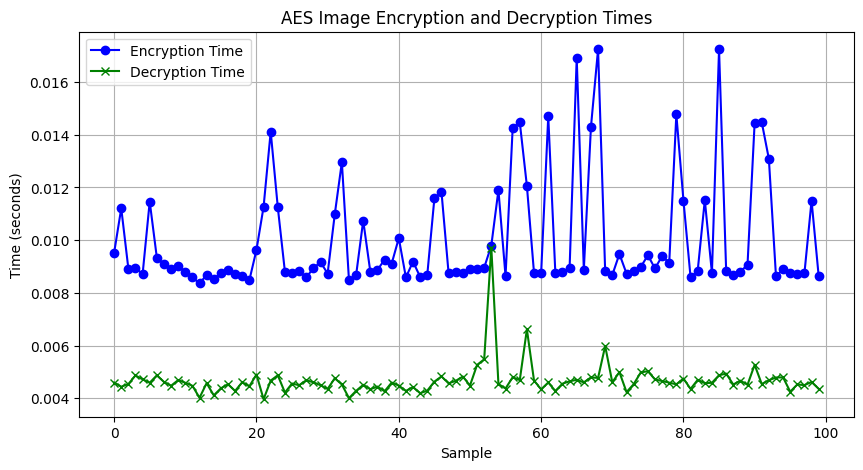

In [ ]:
#SCENERY IMAGE
import os
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.primitives import padding
from PIL import Image
import time
import matplotlib.pyplot as plt

def encrypt_image(image_path, block_size=128):
    # Load the image file
    image = Image.open(image_path)
    image_bytes = image.tobytes()

    # Generate a random IV for the stream cipher
    iv = os.urandom(block_size // 8)

    # Generate a random key for the block cipher
    key = os.urandom(block_size // 8)

    # Create a block cipher object using AES algorithm
    cipher = Cipher(algorithms.AES(key), modes.CBC(iv))

    # Add PKCS7 padding to the image data
    padder = padding.PKCS7(block_size).padder()
    padded_image_data = padder.update(image_bytes)
    padded_image_data += padder.finalize()

    # Create an encryptor and encrypt the padded image data
    encryptor = cipher.encryptor()

    start_time = time.time()
    encrypted_image_data = encryptor.update(padded_image_data) + encryptor.finalize()
    encryption_time = time.time() - start_time

    return encrypted_image_data, iv, key, encryption_time

def decrypt_image(encrypted_image_data, iv, key, block_size=128):
    # Create a block cipher object using AES algorithm
    cipher = Cipher(algorithms.AES(key), modes.CBC(iv))

    # Create a decryptor
    decryptor = cipher.decryptor()

    start_time = time.time()
    decrypted_image_data = decryptor.update(encrypted_image_data) + decryptor.finalize()
    decryption_time = time.time() - start_time

    return decrypted_image_data, decryption_time

# Example usage:
image_path = '/content/scenery.jpg'

# Number of samples for encryption and decryption
num_samples = 100
encryption_times = []
decryption_times = []

for _ in range(num_samples):
    encrypted_data, iv, key, encryption_time = encrypt_image(image_path)
    encryption_times.append(encryption_time)

    decrypted_data, decryption_time = decrypt_image(encrypted_data, iv, key)
    decryption_times.append(decryption_time)

print(encryption_times)
print(decryption_times)
# Plot both encryption and decryption times on the same graph
plt.figure(figsize=(10, 5))
plt.plot(encryption_times, label='Encryption Time', marker='o', color='blue')
plt.plot(decryption_times, label='Decryption Time', marker='x', color='green')
plt.xlabel('Sample')
plt.ylabel('Time (seconds)')
plt.title('AES Image Encryption and Decryption Times')
plt.legend()
plt.grid()
plt.show()


In [ ]:
#DOG IMAGE
import os
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.primitives import padding
from PIL import Image


def encrypt_image(image_path, block_size=128):
    # Load the image file
    image = Image.open(image_path)
    image_bytes = image.tobytes()

    # Generate a random IV for the stream cipher
    iv = os.urandom(block_size // 8)

    # Generate a random key for the block cipher
    key = os.urandom(block_size // 8)

    # Create a block cipher object using AES algorithm
    cipher = Cipher(algorithms.AES(key), modes.CBC(iv))

    # Add PKCS7 padding to the image data
    padder = padding.PKCS7(block_size).padder()
    padded_image_data = padder.update(image_bytes)
    padded_image_data += padder.finalize()

    # Create an encryptor and encrypt the padded image data
    encryptor = cipher.encryptor()
    encrypted_image_data = encryptor.update(padded_image_data) + encryptor.finalize()

    return encrypted_image_data, iv, key


def decrypt_image(encrypted_image_data, iv, key, block_size=128):
    # Create a block cipher object using AES algorithm
    cipher = Cipher(algorithms.AES(key), modes.CBC(iv))

    # Create a decryptor and decrypt the encrypted image data
    decryptor = cipher.decryptor()
    decrypted_image_data = decryptor.update(encrypted_image_data) + decryptor.finalize()

    # Remove PKCS7 padding from the decrypted image data
    unpadder = padding.PKCS7(block_size).unpadder()
    unpadded_image_data = unpadder.update(decrypted_image_data)
    unpadded_image_data += unpadder.finalize()

    return unpadded_image_data


# Example usage:
# Encrypt the image
encrypted_data, iv, key = encrypt_image('/content/Dog.jpg')

# Load the original image to get its size
original_image = Image.open('/content/Dog.jpg')
image_size = original_image.size

# Create an Image object from the encrypted image data
encrypted_image = Image.frombytes(mode='RGB', size=image_size, data=encrypted_data)

# Decrypt the image
decrypted_data = decrypt_image(encrypted_data, iv, key)

# Create an Image object from the decrypted image data
decrypted_image = Image.frombytes(mode='RGB', size=image_size, data=decrypted_data)

# Save the encrypted image to a file
encrypted_image.save('encrypted_image1.jpg')

# Save the decrypted image to a file
decrypted_image.save('decrypted_image1.jpg')


[0.003041505813598633, 0.0027909278869628906, 0.002780437469482422, 0.0028815269470214844, 0.0027594566345214844, 0.0027475357055664062, 0.0026323795318603516, 0.0027000904083251953, 0.0028471946716308594, 0.0028891563415527344, 0.0028183460235595703, 0.0027832984924316406, 0.002784252166748047, 0.002859830856323242, 0.003013134002685547, 0.0028243064880371094, 0.00290679931640625, 0.0028007030487060547, 0.0026900768280029297, 0.0028433799743652344, 0.003094196319580078, 0.0027923583984375, 0.002747058868408203, 0.002568960189819336, 0.0026330947875976562, 0.0026679039001464844, 0.0026357173919677734, 0.002727985382080078, 0.0027387142181396484, 0.002592325210571289, 0.002873659133911133, 0.002757549285888672, 0.002711057662963867, 0.002645254135131836, 0.0026962757110595703, 0.0027642250061035156, 0.0026845932006835938, 0.002658367156982422, 0.002862215042114258, 0.0026531219482421875, 0.002721548080444336, 0.003337383270263672, 0.0027670860290527344, 0.0026628971099853516, 0.00285625

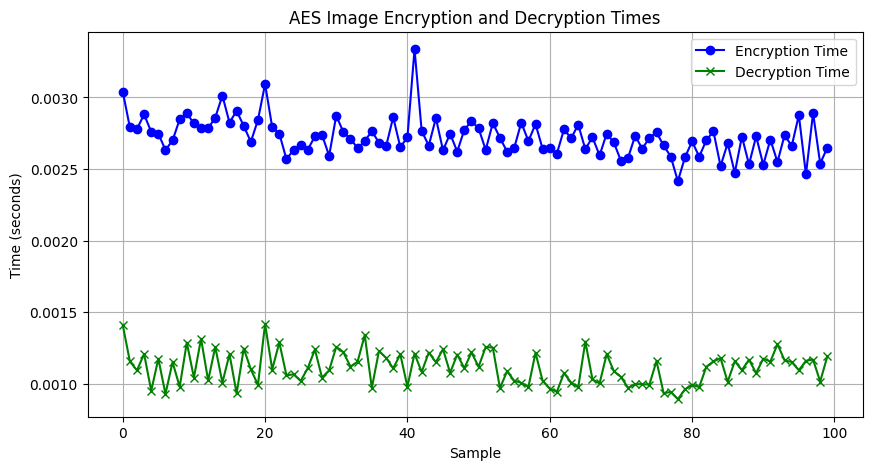

In [ ]:
import os
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.primitives import padding
from PIL import Image
import time
import matplotlib.pyplot as plt

def encrypt_image(image_path, block_size=128):
    # Load the image file
    image = Image.open(image_path)
    image_bytes = image.tobytes()

    # Generate a random IV for the stream cipher
    iv = os.urandom(block_size // 8)

    # Generate a random key for the block cipher
    key = os.urandom(block_size // 8)

    # Create a block cipher object using AES algorithm
    cipher = Cipher(algorithms.AES(key), modes.CBC(iv))

    # Add PKCS7 padding to the image data
    padder = padding.PKCS7(block_size).padder()
    padded_image_data = padder.update(image_bytes)
    padded_image_data += padder.finalize()

    # Create an encryptor and encrypt the padded image data
    encryptor = cipher.encryptor()

    start_time = time.time()
    encrypted_image_data = encryptor.update(padded_image_data) + encryptor.finalize()
    encryption_time = time.time() - start_time

    return encrypted_image_data, iv, key, encryption_time

def decrypt_image(encrypted_image_data, iv, key, block_size=128):
    # Create a block cipher object using AES algorithm
    cipher = Cipher(algorithms.AES(key), modes.CBC(iv))

    # Create a decryptor
    decryptor = cipher.decryptor()

    start_time = time.time()
    decrypted_image_data = decryptor.update(encrypted_image_data) + decryptor.finalize()
    decryption_time = time.time() - start_time

    return decrypted_image_data, decryption_time

# Example usage:
image_path = '/content/Dog.jpg'

# Number of samples for encryption and decryption
num_samples = 100
encryption_times = []
decryption_times = []

for _ in range(num_samples):
    encrypted_data, iv, key, encryption_time = encrypt_image(image_path)
    encryption_times.append(encryption_time)

    decrypted_data, decryption_time = decrypt_image(encrypted_data, iv, key)
    decryption_times.append(decryption_time)

print(encryption_times)
print(decryption_times)
# Plot both encryption and decryption times on the same graph
plt.figure(figsize=(10, 5))
plt.plot(encryption_times, label='Encryption Time', marker='o', color='blue')
plt.plot(decryption_times, label='Decryption Time', marker='x', color='green')
plt.xlabel('Sample')
plt.ylabel('Time (seconds)')
plt.title('AES Image Encryption and Decryption Times')
plt.legend()
plt.grid()
plt.show()


In [ ]:
#PANCAKES
import os
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.primitives import padding
from PIL import Image


def encrypt_image(image_path, block_size=128):
    # Load the image file
    image = Image.open(image_path)
    image_bytes = image.tobytes()

    # Generate a random IV for the stream cipher
    iv = os.urandom(block_size // 8)

    # Generate a random key for the block cipher
    key = os.urandom(block_size // 8)

    # Create a block cipher object using AES algorithm
    cipher = Cipher(algorithms.AES(key), modes.CBC(iv))

    # Add PKCS7 padding to the image data
    padder = padding.PKCS7(block_size).padder()
    padded_image_data = padder.update(image_bytes)
    padded_image_data += padder.finalize()

    # Create an encryptor and encrypt the padded image data
    encryptor = cipher.encryptor()
    encrypted_image_data = encryptor.update(padded_image_data) + encryptor.finalize()

    return encrypted_image_data, iv, key


def decrypt_image(encrypted_image_data, iv, key, block_size=128):
    # Create a block cipher object using AES algorithm
    cipher = Cipher(algorithms.AES(key), modes.CBC(iv))

    # Create a decryptor and decrypt the encrypted image data
    decryptor = cipher.decryptor()
    decrypted_image_data = decryptor.update(encrypted_image_data) + decryptor.finalize()

    # Remove PKCS7 padding from the decrypted image data
    unpadder = padding.PKCS7(block_size).unpadder()
    unpadded_image_data = unpadder.update(decrypted_image_data)
    unpadded_image_data += unpadder.finalize()

    return unpadded_image_data


# Example usage:
# Encrypt the image
encrypted_data, iv, key = encrypt_image('/content/Pancakes.jpg')

# Load the original image to get its size
original_image = Image.open('/content/Pancakes.jpg')
image_size = original_image.size

# Create an Image object from the encrypted image data
encrypted_image = Image.frombytes(mode='RGB', size=image_size, data=encrypted_data)

# Decrypt the image
decrypted_data = decrypt_image(encrypted_data, iv, key)

# Create an Image object from the decrypted image data
decrypted_image = Image.frombytes(mode='RGB', size=image_size, data=decrypted_data)

# Save the encrypted image to a file
encrypted_image.save('encrypted_image2.jpg')

# Save the decrypted image to a file
decrypted_image.save('decrypted_image2.jpg')

[0.016232013702392578, 0.017393112182617188, 0.008913755416870117, 0.009074926376342773, 0.008916616439819336, 0.011922597885131836, 0.008972644805908203, 0.01328277587890625, 0.00894474983215332, 0.008846521377563477, 0.0123443603515625, 0.008960962295532227, 0.009096145629882812, 0.008923053741455078, 0.015535831451416016, 0.015369892120361328, 0.026470661163330078, 0.02594614028930664, 0.05305194854736328, 0.015874147415161133, 0.009636878967285156, 0.008847713470458984, 0.009297370910644531, 0.008867502212524414, 0.012957572937011719, 0.00932002067565918, 0.00918436050415039, 0.010619401931762695, 0.009103536605834961, 0.012155294418334961, 0.01743912696838379, 0.011289596557617188, 0.009205102920532227, 0.00960683822631836, 0.011864662170410156, 0.010554313659667969, 0.014534473419189453, 0.014637947082519531, 0.008951902389526367, 0.012502908706665039, 0.022446393966674805, 0.009461164474487305, 0.011103391647338867, 0.009834766387939453, 0.010097265243530273, 0.01330304145812988

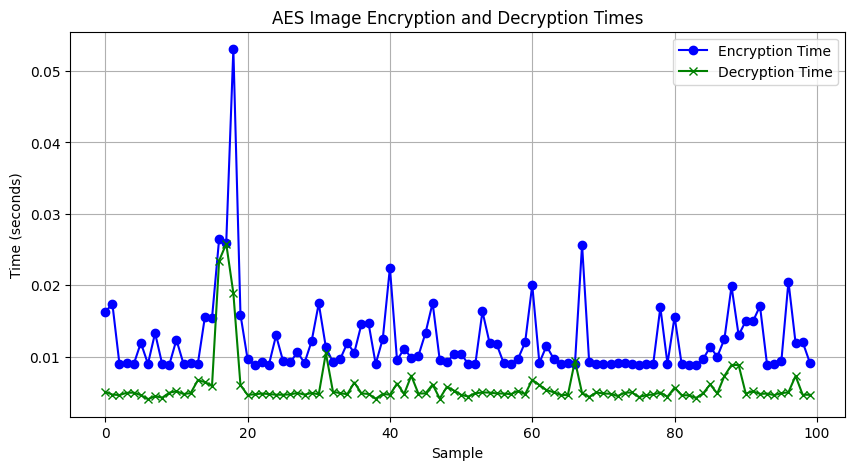

In [ ]:
#PANCAKES
import os
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.primitives import padding
from PIL import Image
import time
import matplotlib.pyplot as plt

def encrypt_image(image_path, block_size=128):
    # Load the image file
    image = Image.open(image_path)
    image_bytes = image.tobytes()

    # Generate a random IV for the stream cipher
    iv = os.urandom(block_size // 8)

    # Generate a random key for the block cipher
    key = os.urandom(block_size // 8)

    # Create a block cipher object using AES algorithm
    cipher = Cipher(algorithms.AES(key), modes.CBC(iv))

    # Add PKCS7 padding to the image data
    padder = padding.PKCS7(block_size).padder()
    padded_image_data = padder.update(image_bytes)
    padded_image_data += padder.finalize()

    # Create an encryptor and encrypt the padded image data
    encryptor = cipher.encryptor()

    start_time = time.time()
    encrypted_image_data = encryptor.update(padded_image_data) + encryptor.finalize()
    encryption_time = time.time() - start_time

    return encrypted_image_data, iv, key, encryption_time

def decrypt_image(encrypted_image_data, iv, key, block_size=128):
    # Create a block cipher object using AES algorithm
    cipher = Cipher(algorithms.AES(key), modes.CBC(iv))

    # Create a decryptor
    decryptor = cipher.decryptor()

    start_time = time.time()
    decrypted_image_data = decryptor.update(encrypted_image_data) + decryptor.finalize()
    decryption_time = time.time() - start_time

    return decrypted_image_data, decryption_time

# Example usage:
image_path = '/content/Pancakes.jpg'

# Number of samples for encryption and decryption
num_samples = 100
encryption_times = []
decryption_times = []

for _ in range(num_samples):
    encrypted_data, iv, key, encryption_time = encrypt_image(image_path)
    encryption_times.append(encryption_time)

    decrypted_data, decryption_time = decrypt_image(encrypted_data, iv, key)
    decryption_times.append(decryption_time)

print(encryption_times)
print(decryption_times)
# Plot both encryption and decryption times on the same graph
plt.figure(figsize=(10, 5))
plt.plot(encryption_times, label='Encryption Time', marker='o', color='blue')
plt.plot(decryption_times, label='Decryption Time', marker='x', color='green')
plt.xlabel('Sample')
plt.ylabel('Time (seconds)')
plt.title('AES Image Encryption and Decryption Times')
plt.legend()
plt.grid()
plt.show()